# Consistency between PENDF/ENDF-6(nubar) and perturbations: U-235

In [1]:
import sandy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
endf6 = sandy.get_endf6_file("jeff_33", "xs", 922350)

In [3]:
ign = 3  # ECCO 33 groups
nsmp = 10
smps = endf6.get_perturbations(
    nsmp,
    njoy_kws=dict(err=1, errorr33_kws=dict(ign=ign), errorr31_kws=dict(ign=ign)),
    smp_kws=dict(seed31=31, seed33=33),
)

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    



 njoy 2016.72  29Sep23                                       10/11/23 14:35:29
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.2s

 ---message from rdf2bw---calculation of angular distribution not installed.

 moder...                                                                11.3s

 groupr...                                                               12.0s

 ---message from groupr---auto finds no reactions for mf=  5

 moder...                                                                12.3s

 errorr...                                                               12.3s

 ---message from grpav---mf  3 mt  37
                          has threshold gt highest union energy.

 processing mat  9228
 ---------------------
  92-U -235 IRSN-CEA   EVAL-DEC14 IRSN-CEA DAM/DEN COLLAB.           



INFO:  writing to file 'PERT_92235_MF31.xlsx'...
INFO:  writing to file 'PERT_92235_MF33.xlsx'...


In [4]:
beg = end = i = np.random.randint(0, nsmp-1)
file = "PERT_92235_MF33.xlsx"
s33 = sandy.Samples.from_excel(file, beg=beg, end=end)
file = "PERT_92235_MF31.xlsx"
s31 = sandy.Samples.from_excel(file, beg=beg, end=end)
smps = {33: s33, 31: s31}

In [5]:
outs = endf6.apply_perturbations(smps=smps, njoy_kws=dict(err=1, minimal_processing=True), verbose=True)

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    



 njoy 2016.72  29Sep23                                       10/11/23 14:35:43
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.2s

 ---message from rdf2bw---calculation of angular distribution not installed.

 moder...                                                                11.3s
                                                                         12.0s
 *****************************************************************************
Processing xs sample 0...
Processing xs sample 0...


In [6]:
pendf = endf6.get_pendf(err=1)
xs = sandy.Xs.from_endf6(pendf).data[9228]

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    



 njoy 2016.72  29Sep23                                       10/11/23 14:35:58
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.2s

 ---message from rdf2bw---calculation of angular distribution not installed.

 moder...                                                                11.3s
                                                                         12.0s
 *****************************************************************************


In [7]:
nu = sandy.Xs.from_endf6(endf6.filter_by(listmt=[452, 455, 456])).data[9228]

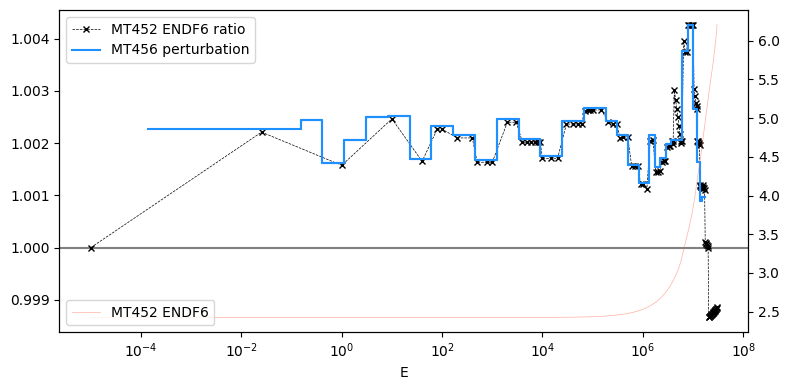

In [8]:
nu_i = sandy.Xs.from_endf6(outs[i]["endf6"].filter_by(listmt=[452, 455, 456])).data[9228]
ratio = nu_i / nu
mt = 452
mtp = 456

s = smps[31].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} ENDF6 ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

nu[mt].plot(ax=ax2, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} ENDF6")
ax2.legend(loc=3)

fig.tight_layout()

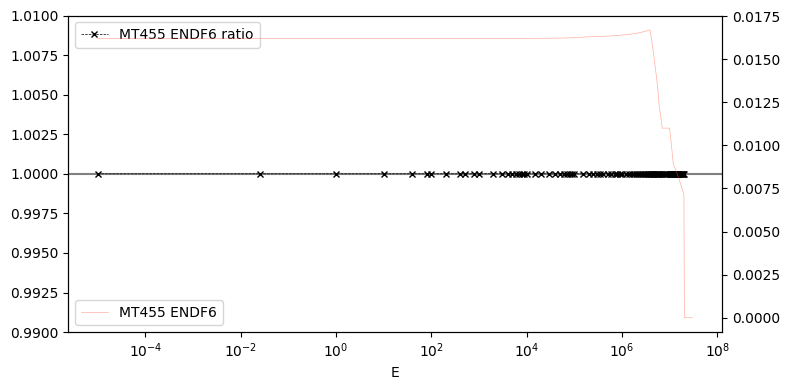

In [9]:
nu_i = sandy.Xs.from_endf6(outs[i]["endf6"].filter_by(listmt=[452, 455, 456])).data[9228]
ratio = nu_i / nu
mt = 455

s = smps[31].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} ENDF6 ratio")
ax.legend(loc=2)
ax.set(ylim=(0.99, 1.01))

nu[mt].plot(ax=ax2, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} ENDF6")
ax2.legend(loc=3)

fig.tight_layout()

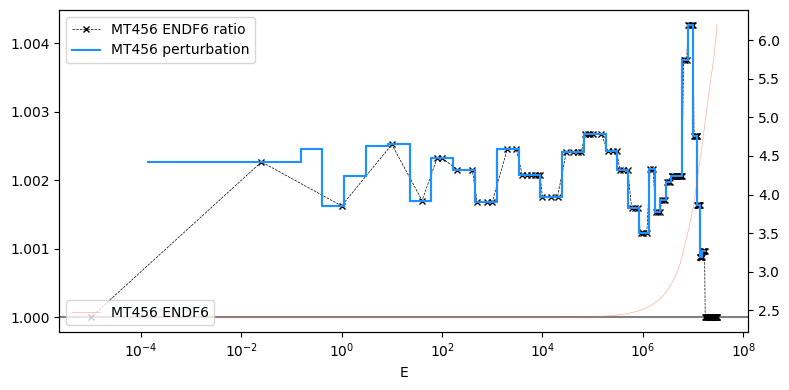

In [10]:
nu_i = sandy.Xs.from_endf6(outs[i]["endf6"].filter_by(listmt=[452, 455, 456])).data[9228]
ratio = nu_i / nu
mt = 456
mtp = 456

s = smps[31].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} ENDF6 ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

nu[mt].plot(ax=ax2, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} ENDF6")
ax2.legend(loc=3)

fig.tight_layout()

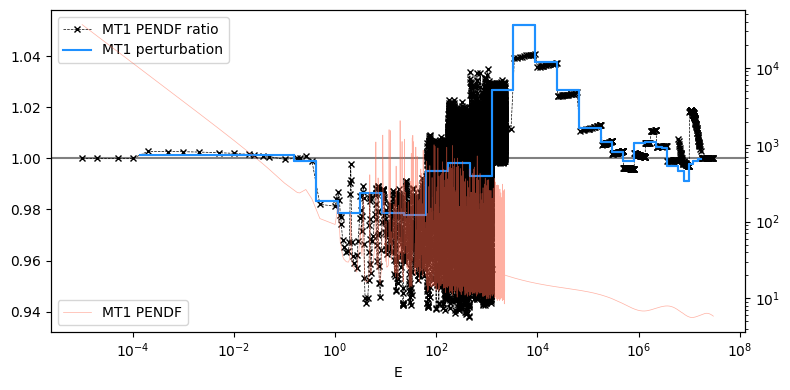

In [11]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 1
mtp = 1

s = smps[33].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

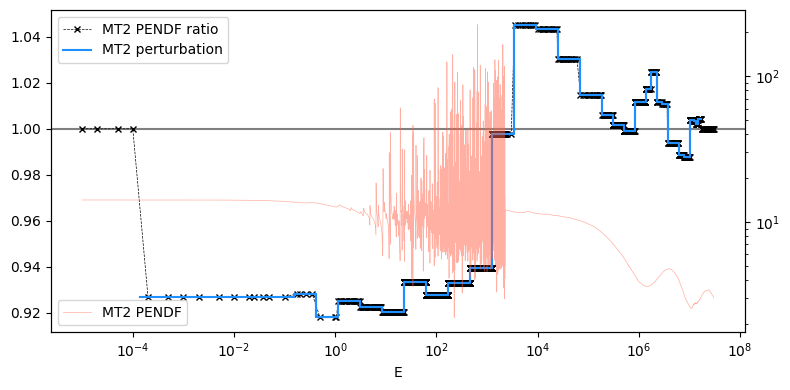

In [12]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 2
mtp = 2

s = smps[33].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

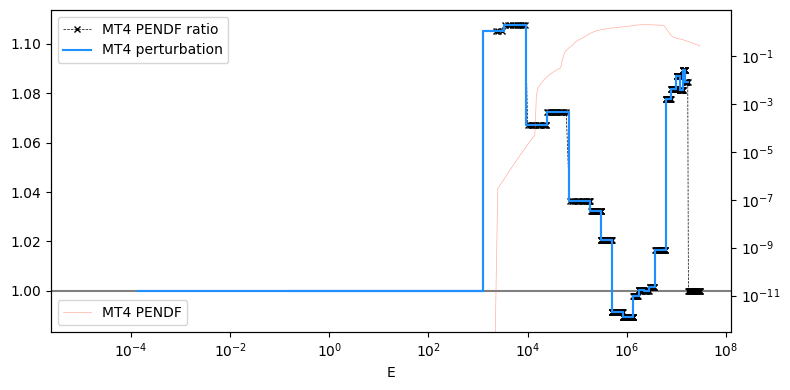

In [13]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 4
mtp = 4

s = smps[33].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

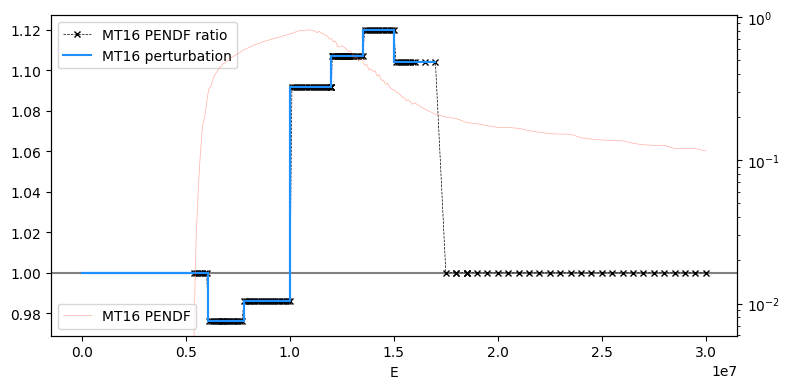

In [14]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 16
mtp = 16

s = smps[33].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

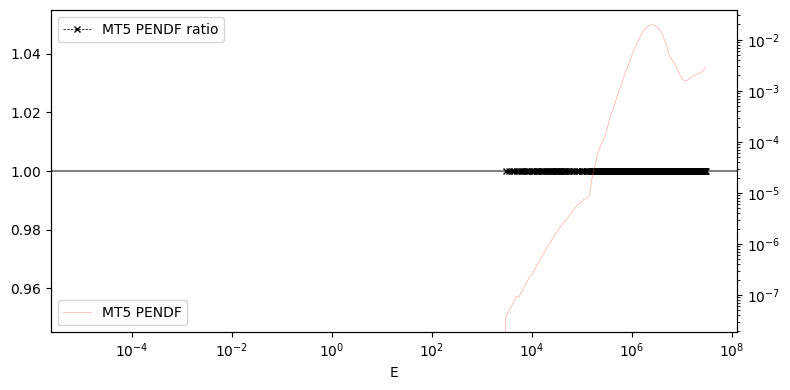

In [15]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 5

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

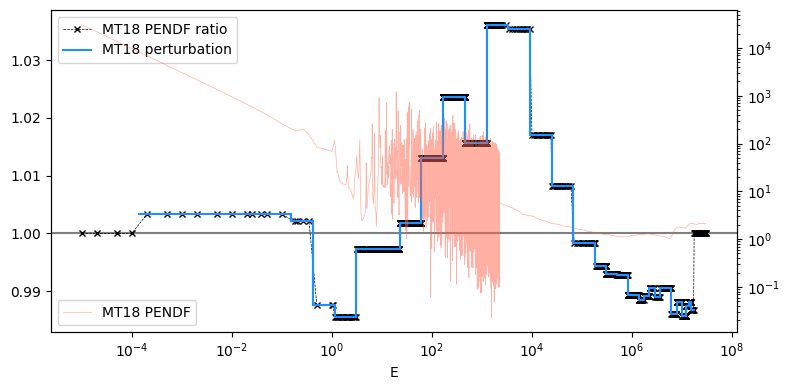

In [16]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 18
mtp = 18

s = smps[33].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

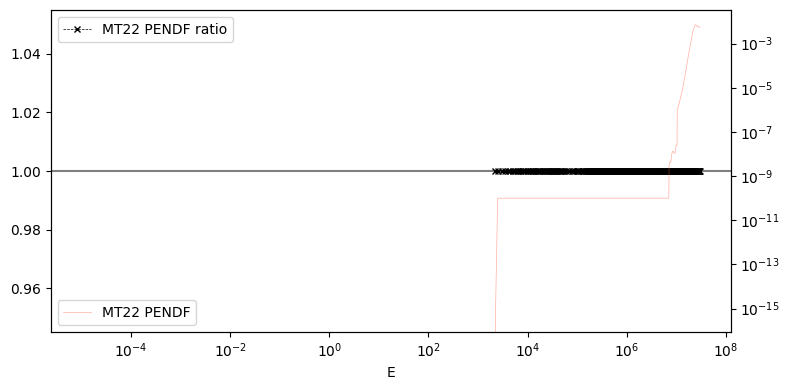

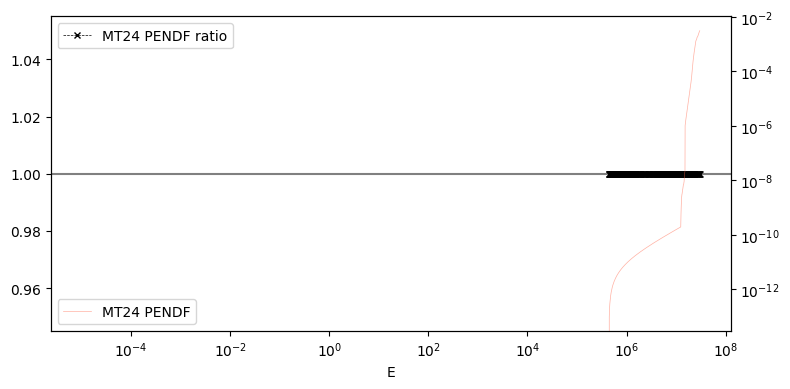

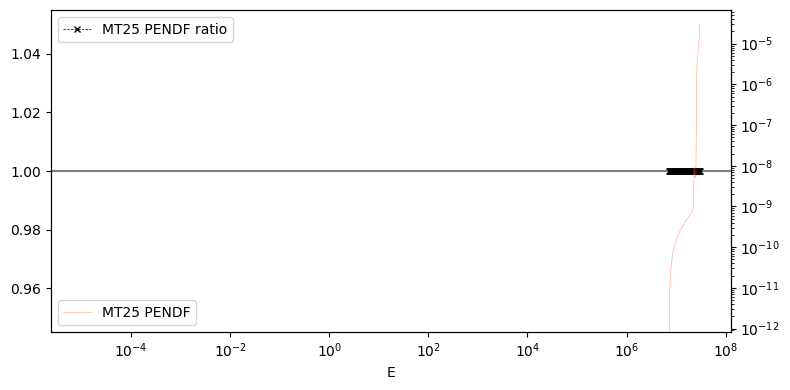

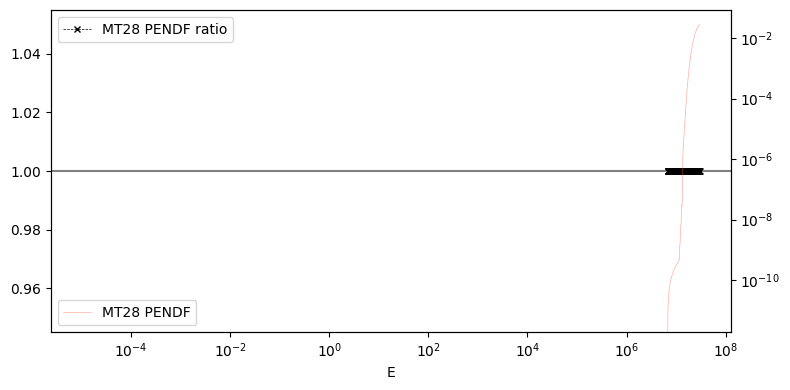

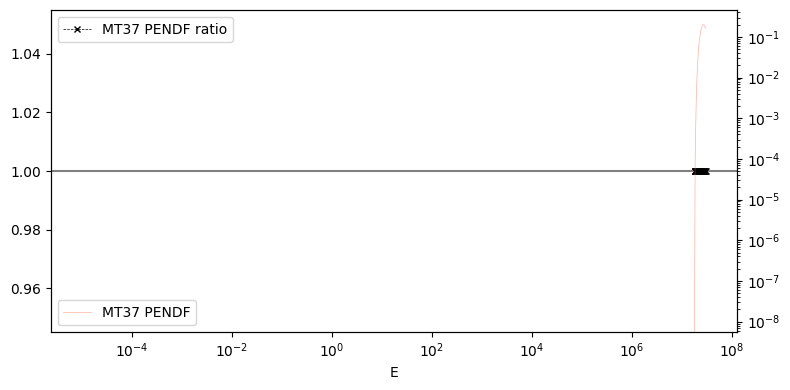

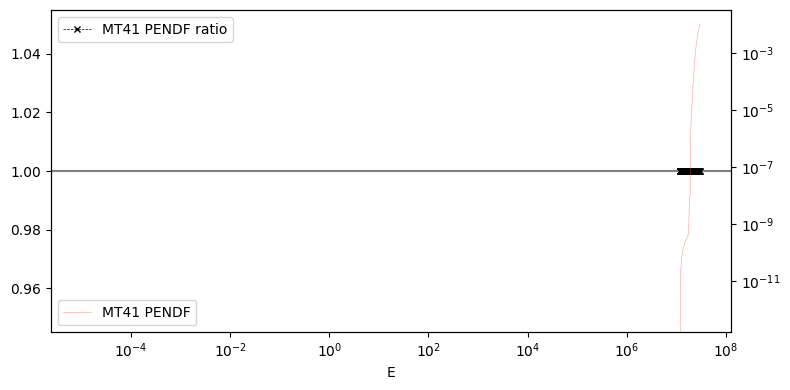

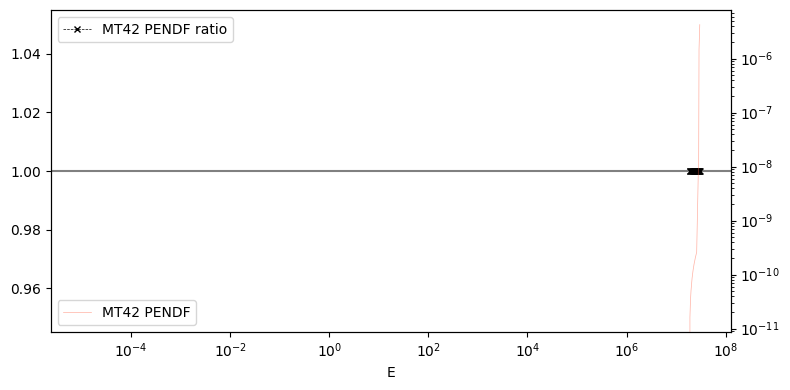

In [17]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
for mt in [22, 24, 25, 28, 37, 41, 42]:
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax2 = ax.twinx()

    ax.axhline(1, color="gray")
    ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
    ax.legend(loc=2)

    xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
    ax2.legend(loc=3)

    fig.tight_layout()

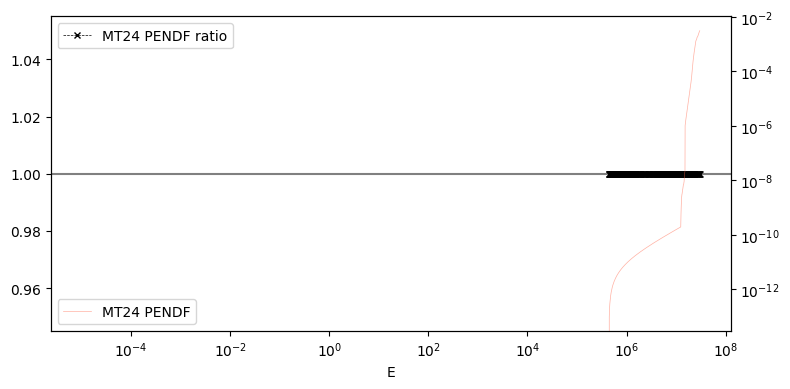

In [18]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 24

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

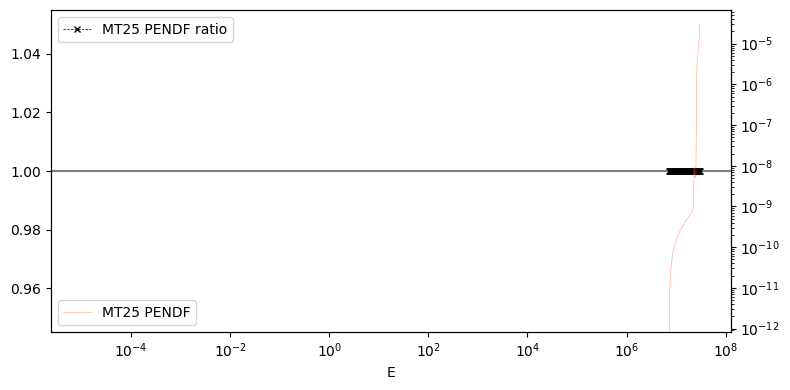

In [19]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 25

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

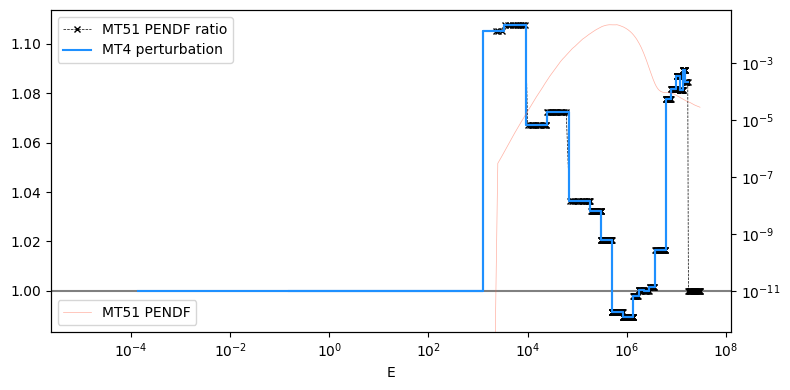

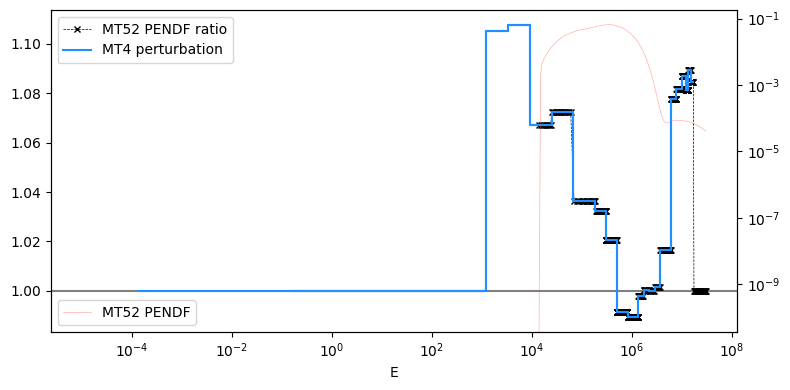

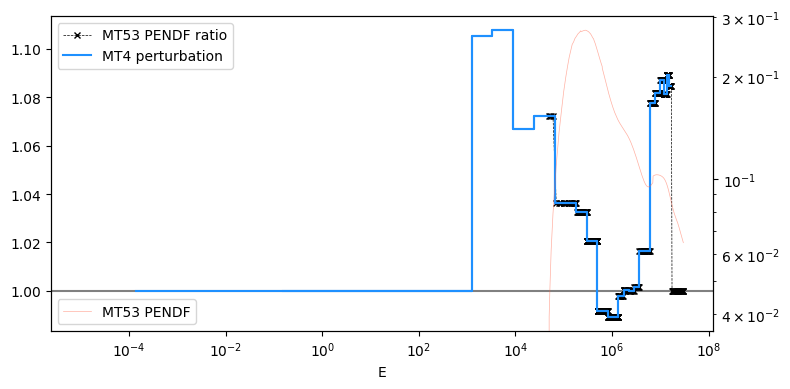

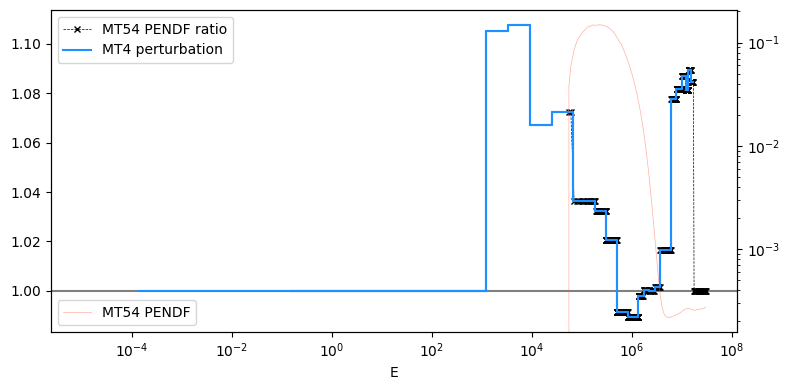

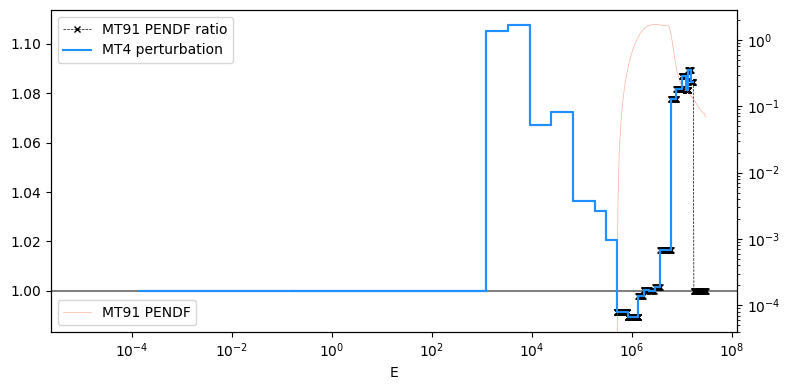

In [20]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
for mt in list(range(51, 55)) + [91]:
    mtp = 4

    s = smps[33].data.loc[(9228, mtp)]
    s1 = s.copy()
    s1.index = [x.right for x in s.index]
    s2 = s.copy()
    s2.index = [x.left for x in s.index]

    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax2 = ax.twinx()

    ax.axhline(1, color="gray")
    ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
    s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
    s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
    ax.legend(loc=2)

    xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
    ax2.legend(loc=3)

    fig.tight_layout()

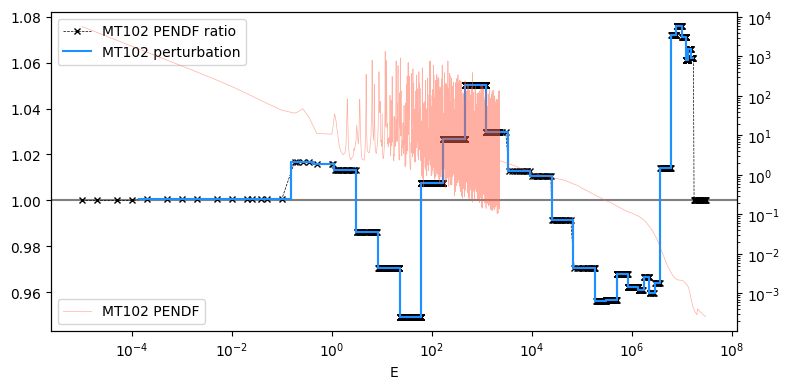

In [21]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 102
mtp = 102

s = smps[33].data.loc[(9228, mtp)]
s1 = s.copy()
s1.index = [x.right for x in s.index]
s2 = s.copy()
s2.index = [x.left for x in s.index]

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
s1.squeeze().plot(drawstyle="steps-pre", color="dodgerblue", ax=ax, label=f"MT{mtp} perturbation")
s2.squeeze().plot(drawstyle="steps-post", color="dodgerblue", ax=ax, label="")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

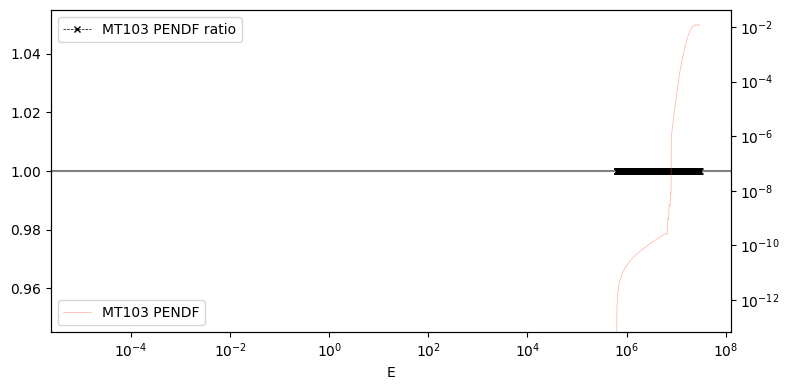

In [22]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 103

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()

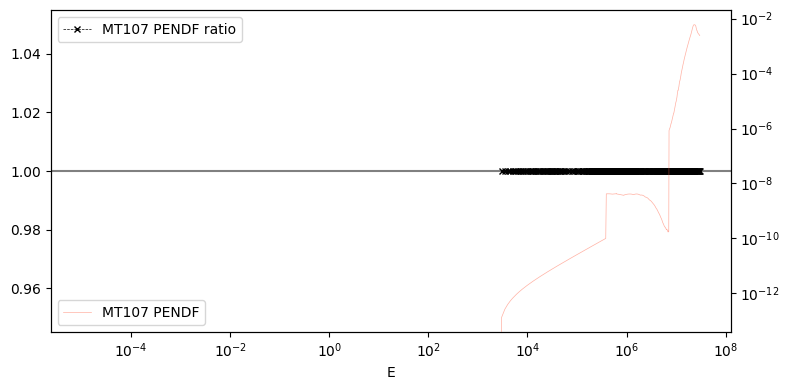

In [23]:
xs_i = sandy.Xs.from_endf6(outs[i]["pendf"]).data[9228]
ratio = xs_i / xs
mt = 107

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
ax2 = ax.twinx()

ax.axhline(1, color="gray")
ratio[mt].plot(logx=True, marker="x", ms=5, ls="--", color="k", lw=.5, ax=ax, label=f"MT{mt} PENDF ratio")
ax.legend(loc=2)

xs[mt].plot(ax=ax2, logy=True, color="tomato", ls="-",  lw=.5, alpha=.5, label=f"MT{mt} PENDF")
ax2.legend(loc=3)

fig.tight_layout()